![](https://cdn.vox-cdn.com/thumbor/AMBYWEF-7LKgQPPw6bzYRtQYtyA=/0x0:3300x2196/1200x800/filters:focal(1386x834:1914x1362)/cdn.vox-cdn.com/uploads/chorus_image/image/71784961/1245717238.0.jpg)

**<font size = "3"> 
    Netflix is an American production company and streaming service that provides video on-demand based in Los Gatos, California. It was founded in 1997 by Reed Hastings and Marc Randolph in Scotts Valley, California. It offers a wide variety of films and television series through distribution deals as well as creating their own productions, known as Netflix Originals.** 

**<font size = "3">As of today, Netflix is one of the biggest streaming platforms in the world. As one of the biggest streaming platforms in the world, their data offers interesting insights that reflect the current trend and interest of the type of content that consumers enjoy globally. So, with the data provided, it will help tell a story with the numerous visualizations and comments below.**   


# Importing Libraries

In [1]:
# Loading necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [2]:
# Reading the csv file
netflix_df = pd.read_csv("/kaggle/input/netflix-shows/netflix_titles.csv")

# Looking inside the dataframe

In [3]:
# Checking inside the dataframe
netflix_df.head() # Looks at the first five rows of the df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
# Checking the number of rows and columns inside the dataframe
print("There are {} rows and {} columns in this dataset.".format(netflix_df.shape[0], netflix_df.shape[1]))

There are 8807 rows and 12 columns in this dataset.


In [5]:
# Checking some information about the dataframe's columns
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [6]:
# Looking at the amount of null values by each column
missing_values_count = netflix_df.isnull().sum()
missing_values_count

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

<font size = "2">**There are null values in several different columns (director, cast, country, date_added, rating, and duration).**

In [7]:
# Finding the percentage of null values in the dataframe
total_values = np.product(netflix_df.shape) # Multiplying the total amount of columns and rows
total_missing = missing_values_count.sum() # Adding the total number of null values
percent_missing = round((total_missing/total_values) * 100, 2) # Finding the percentage of total null values 
print("{}% of the total values in the dataframe are null.".format(percent_missing))

4.08% of the total values in the dataframe are null.


In [8]:
# Checking to see if there are any duplicates in the dataframe
print("There are {} duplicates in the dataframe.".format(netflix_df.duplicated().sum()))

There are 0 duplicates in the dataframe.


# Working with the type column

In [9]:
# Checking to see the unique values inside the column
netflix_df["type"].unique()

array(['Movie', 'TV Show'], dtype=object)

In [10]:
# Checking the number of Movies/TV Shows
netflix_df["type"].value_counts()

Movie      6131
TV Show    2676
Name: type, dtype: int64

<AxesSubplot:ylabel='type'>

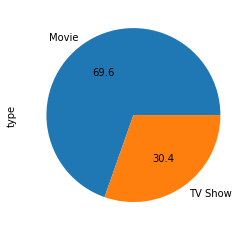

In [11]:
netflix_df["type"].value_counts().plot(kind = "pie", autopct = "%.1f")

<font size = "2">**69.6% of the total content on Netflix are movies while 30.4% of the total count is TV Shows.**

Text(0.5, 1.0, 'Number of Movies/Tv Shows')

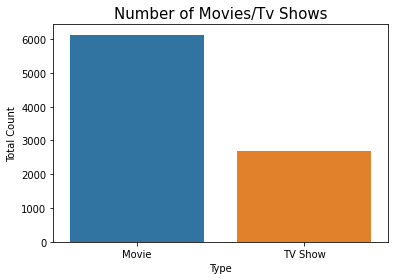

In [12]:
# Creating a bar graph 
sns.countplot(x = "type", data = netflix_df)
plt.xlabel("Type")
plt.ylabel("Total Count")
plt.title("Number of Movies/Tv Shows", size = 15)

<font size = "2">**As the bar graph illustrates, there are significantly more movies available compared to tv shows. With 6131 movie titles to choose from and 2676 tv shows to choose from on Netflix.**

## Working with the rating column

In [13]:
# Checking to see the unique values inside the column
netflix_df["rating"].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR', nan,
       'TV-Y7-FV', 'UR'], dtype=object)

In [14]:
# Counting the number of contents by rating
netflix_df["rating"].value_counts()

TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: rating, dtype: int64

Text(0.5, 1.0, 'Most Common Rating On Netflix')

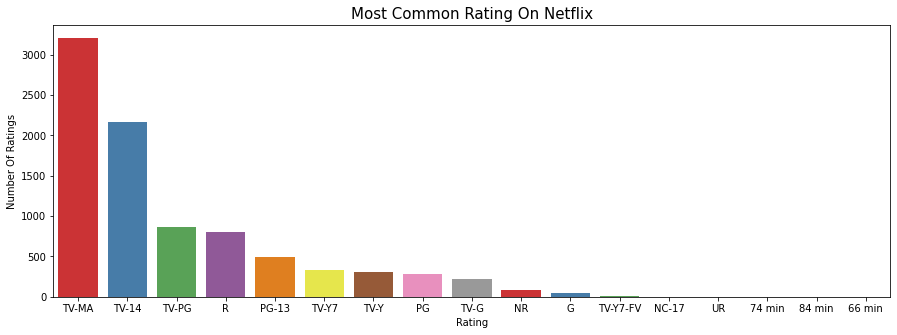

In [15]:
# Creating a bar graph 
plt.figure(figsize = (15, 5))
sns.countplot(x = "rating", data = netflix_df, palette = "Set1", order = netflix_df["rating"].value_counts().index)
plt.xlabel("Rating")
plt.ylabel("Number Of Ratings")
plt.title("Most Common Rating On Netflix", size=15)

**<font size = "2"> The rating found most commonly on Netflix would be TV-MA movies and TV shows followed by TV-14 and TV-PG. The contents found on Netflix seem to focus more towards adults and older teenagers, as the majority of the top 5 ratings are aimed towards them (TV-MA, TV-14, R). However, there are a decent amount of content that can be found for children who are thirteen and under (TV-PG, PG-13, PG, TV-G).**

# Working with the release year column

In [16]:
# Checking to see the unique values inside the column
netflix_df["release_year"].unique()

array([2020, 2021, 1993, 2018, 1996, 1998, 1997, 2010, 2013, 2017, 1975,
       1978, 1983, 1987, 2012, 2001, 2014, 2002, 2003, 2004, 2011, 2008,
       2009, 2007, 2005, 2006, 1994, 2015, 2019, 2016, 1982, 1989, 1990,
       1991, 1999, 1986, 1992, 1984, 1980, 1961, 2000, 1995, 1985, 1976,
       1959, 1988, 1981, 1972, 1964, 1945, 1954, 1979, 1958, 1956, 1963,
       1970, 1973, 1925, 1974, 1960, 1966, 1971, 1962, 1969, 1977, 1967,
       1968, 1965, 1946, 1942, 1955, 1944, 1947, 1943])

<AxesSubplot:>

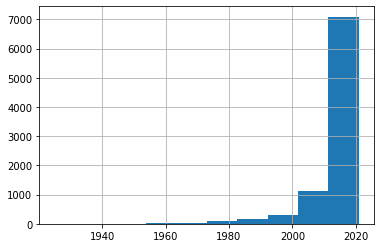

In [17]:
# Creating a histogram graph
netflix_df["release_year"].hist()

**<font size = "2"> According to this histogram, the majority of the content found on Netflix have released after the early 2000's with even more of the content being released after 2010 - 2020.**

In [18]:
# Looking at the top 25 release years that have the most content on Netflix
netflix_df["release_year"].value_counts()[:25]

2018    1147
2017    1032
2019    1030
2020     953
2016     902
2021     592
2015     560
2014     352
2013     288
2012     237
2010     194
2011     185
2009     152
2008     136
2006      96
2007      88
2005      80
2004      64
2003      61
2002      51
2001      45
1999      39
1997      38
2000      37
1998      36
Name: release_year, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73]),
 [Text(0, 0, '2018'),
  Text(1, 0, '2017'),
  Text(2, 0, '2019'),
  Text(3, 0, '2020'),
  Text(4, 0, '2016'),
  Text(5, 0, '2021'),
  Text(6, 0, '2015'),
  Text(7, 0, '2014'),
  Text(8, 0, '2013'),
  Text(9, 0, '2012'),
  Text(10, 0, '2010'),
  Text(11, 0, '2011'),
  Text(12, 0, '2009'),
  Text(13, 0, '2008'),
  Text(14, 0, '2006'),
  Text(15, 0, '2007'),
  Text(16, 0, '2005'),
  Text(17, 0, '2004'),
  Text(18, 0, '2003'),
  Text(19, 0, '2002'),
  Text(20, 0, '2001'),
  Text(21, 0, '1999'),
  Text(22, 0, '1997'),
  Text(23, 0, '2000'),
  Text(24, 0, '1998'),
  Text(25, 0, '1993'),
  Text(26, 0, '1995'),
  Text(27, 0, '1996'),
  Text(28, 0, '1992'),
  Tex

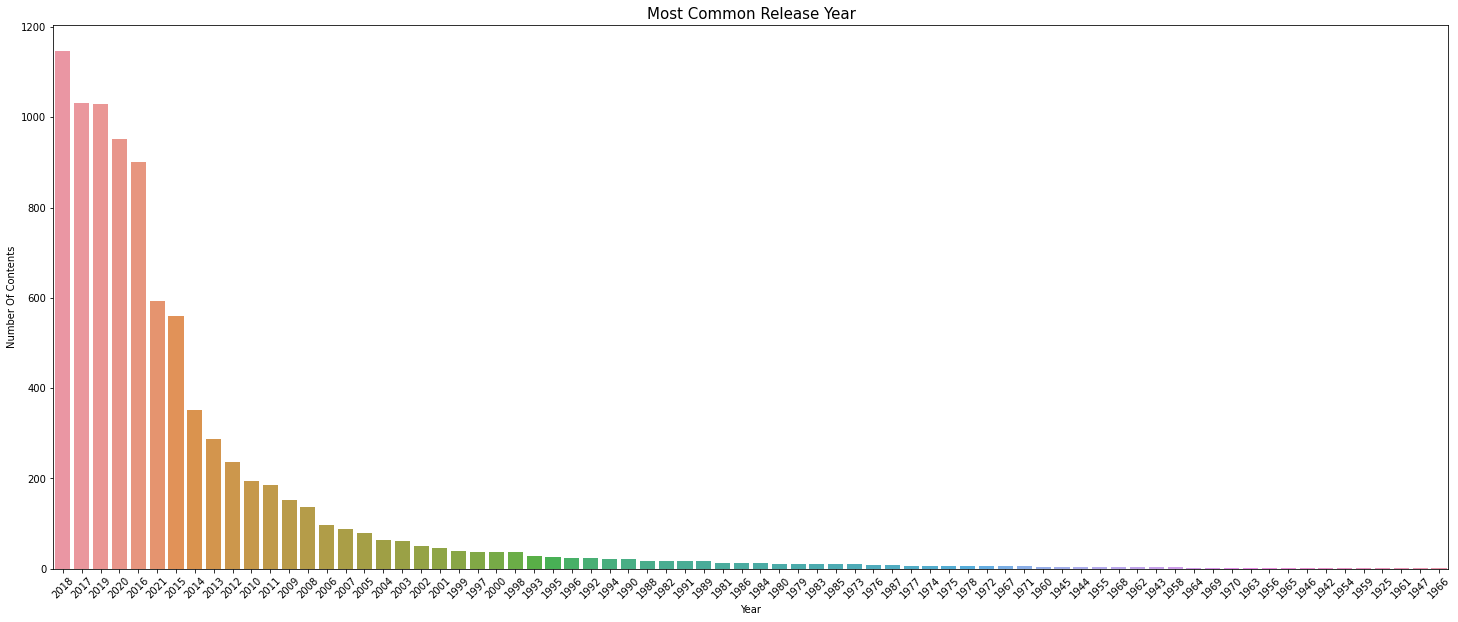

In [19]:
# Creating a bar graph 
plt.figure(figsize = (25, 10))
sns.countplot(x = "release_year", data = netflix_df, order = netflix_df["release_year"].value_counts().index)
plt.xlabel("Year")
plt.ylabel("Number Of Contents")
plt.title("Most Common Release Year", size = 15)
plt.xticks(rotation = 45)

**<font size = "2"> Whilst looking at this bar graph, we can see that the majority of content found on Netflix was released after the early 2000's and into 2010 - 2021 as mentioned before. An interesting thing to note is that, there are only two years in the 1990's that have more content than any year in the 2000's.** 
 
**So in conclusion, the majority of content that you can watch on Netflix would be Movies and TV Shows that were released from the early 2000's to 2021. Though, users who want to watch older films still have options, abeit fewer due to demand and quantity of films.**

# Working with the date added column

In [20]:
netflix_df["date_added"].head()

0    September 25, 2021
1    September 24, 2021
2    September 24, 2021
3    September 24, 2021
4    September 24, 2021
Name: date_added, dtype: object

In [21]:
# Changing the datatype of the date_added column to datetime
netflix_df['date_added'] = pd.to_datetime(netflix_df['date_added'])

<AxesSubplot:xlabel='date_added', ylabel='Density'>

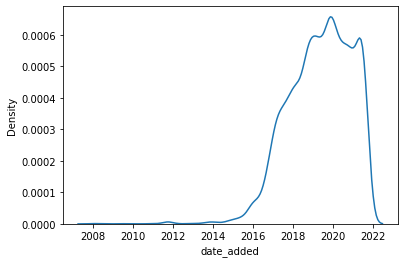

In [22]:
# Creating a kdeplot 
sns.kdeplot(data = netflix_df["date_added"])

<font size = "2">**The majority of the content added were in the years between 2018 and 2022. Growth of content began to raise significantly in 2015 and so forward.**

In [23]:
# Creating a new column date_month as numeric months 
netflix_df["date_month"] = netflix_df["date_added"].dt.month.fillna(0) # Filling null values with 0 in order to convert
netflix_df["date_month"] = netflix_df["date_month"].astype(int)
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   object        
 2   title         8807 non-null   object        
 3   director      6173 non-null   object        
 4   cast          7982 non-null   object        
 5   country       7976 non-null   object        
 6   date_added    8797 non-null   datetime64[ns]
 7   release_year  8807 non-null   int64         
 8   rating        8803 non-null   object        
 9   duration      8804 non-null   object        
 10  listed_in     8807 non-null   object        
 11  description   8807 non-null   object        
 12  date_month    8807 non-null   int64         
dtypes: datetime64[ns](1), int64(2), object(10)
memory usage: 894.6+ KB


Text(0.5, 1.0, 'Total Amount Of Content Added On Different Months')

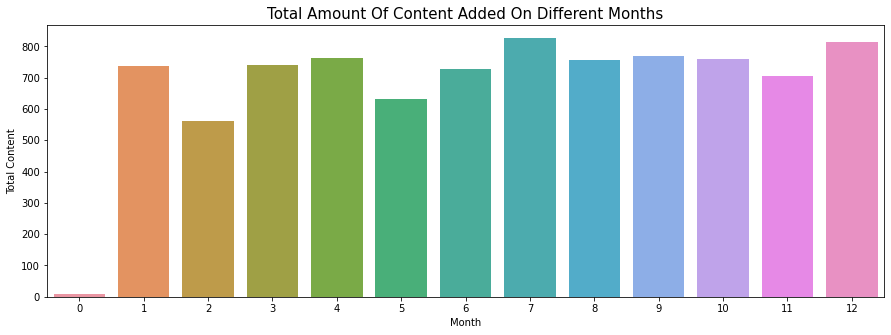

In [24]:
# Creating a bar graph
plt.figure(figsize = (15, 5))
sns.countplot(x = "date_month", data = netflix_df)
plt.xlabel("Month")
plt.ylabel("Total Content")
plt.title("Total Amount Of Content Added On Different Months", size = 15)

**<font size = "2"> Based on what we can see in this bar graph, content is evenually distributed across all the months.**

# Working with the country column

In [25]:
# Checking to see the unique values inside the column
netflix_df["country"].head(50).unique()

array(['United States', 'South Africa', nan, 'India',
       'United States, Ghana, Burkina Faso, United Kingdom, Germany, Ethiopia',
       'United Kingdom', 'Germany, Czech Republic', 'Mexico', 'Turkey',
       'Australia', 'United States, India, France', 'Finland',
       'China, Canada, United States',
       'South Africa, United States, Japan', 'Nigeria'], dtype=object)

In [26]:
# Seperating the "," from the str in the country column
country_cnt = netflix_df.copy()
country_cnt = pd.concat([country_cnt, netflix_df["country"].str.split(",", expand = True)], axis = 1) # Combining the two dataframes
country_cnt

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,...,2,3,4,5,6,7,8,9,10,11
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,...,None,None,None,None,None,None,None,None,None,None
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,...,None,None,None,None,None,None,None,None,None,None
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,...,None,None,None,None,None,None,None,None,None,None
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,...,None,None,None,None,None,None,None,None,None,None
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,...,None,None,None,None,None,None,None,None,None,None
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,2019-07-01,2018,TV-Y7,2 Seasons,...,None,None,None,None,None,None,None,None,None,None
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,...,None,None,None,None,None,None,None,None,None,None
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,...,None,None,None,None,None,None,None,None,None,None


In [27]:
country_cnt = country_cnt.melt(id_vars = ["type", "title"], value_vars = range(12), value_name = "country") # Separating variable and value
country_cnt = country_cnt[country_cnt["country"].notna()] # Filtering for non-null values
country_cnt

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: This dataframe has a column name that matches the 'value_name' column name of the resulting Dataframe. In the future this will raise an error, please set the 'value_name' parameter of DataFrame.melt to a unique name.
  """Entry point for launching an IPython kernel.


,type,title,variable,country
0,Movie,Dick Johnson Is Dead,0,United States
1,TV Show,Blood & Water,0,South Africa
4,TV Show,Kota Factory,0,India
7,Movie,Sankofa,0,United States
8,TV Show,The Great British Baking Show,0,United Kingdom
...,...,...,...,...
78859,Movie,The Look of Silence,8,Germany
85496,Movie,Barbecue,9,Sweden
87666,Movie,The Look of Silence,9,Netherlands
94303,Movie,Barbecue,10,United States


In [28]:
country_cnt["country"] = country_cnt["country"].str.strip() # Removes any spaces

In [29]:
# Looking at the top 10 countries that have the most content on Netflix
country_cnt = country_cnt["country"].value_counts()[:11]
country_cnt

United States     3690
India             1046
United Kingdom     806
Canada             445
France             393
Japan              318
Spain              232
South Korea        231
Germany            226
Mexico             169
China              162
Name: country, dtype: int64

Text(0.5, 1.0, 'Top 10 Countries With The Most Content On Netflix')

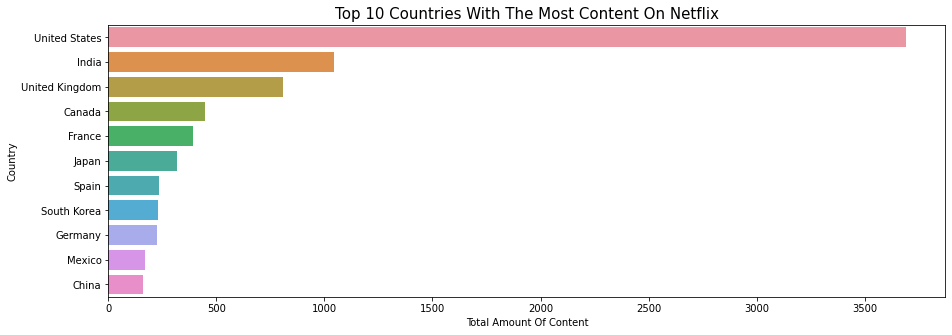

In [30]:
# Creating a bar graph 
plt.figure(figsize = (15, 5))
sns.barplot(x = country_cnt, y = country_cnt.index)
plt.xlabel("Total Amount Of Content")
plt.ylabel("Country")
plt.title("Top 10 Countries With The Most Content On Netflix", size=15)

<font size = "2">**The United States has by far the most content on Netflix with 3,690 films provided followed by India who have 1,046 films, and the United Kingdom who have 806 films. It would also seem that the top 10 countries are either from North America, Europe, or Asia.**

Text(0.5, 1.0, 'Percentage of total content')

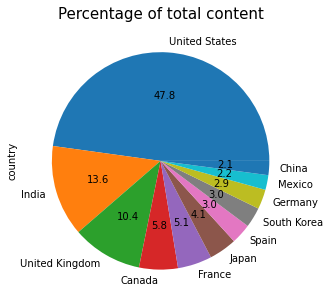

In [31]:
# Creating a pie chart 
plt.figure(figsize = (15,5))
country_cnt.plot(kind = "pie", autopct = "%.1f")
plt.title("Percentage of total content", size = 15)

**<font size = "2"> Pie chart to provide a perspective on the total percentage of content made up of the top 10 countries on Netflix.**


# Working with the director column

In [32]:
netflix_df["director"].head()

0    Kirsten Johnson
1                NaN
2    Julien Leclercq
3                NaN
4                NaN
Name: director, dtype: object

In [33]:
# Looking at the top 10 directors that have the most content on Netflix
director_cnt = netflix_df["director"].value_counts()[:11]
director_cnt

Rajiv Chilaka             19
Raúl Campos, Jan Suter    18
Marcus Raboy              16
Suhas Kadav               16
Jay Karas                 14
Cathy Garcia-Molina       13
Martin Scorsese           12
Youssef Chahine           12
Jay Chapman               12
Steven Spielberg          11
Don Michael Paul          10
Name: director, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'Rajiv Chilaka'),
  Text(1, 0, 'Raúl Campos, Jan Suter'),
  Text(2, 0, 'Marcus Raboy'),
  Text(3, 0, 'Suhas Kadav'),
  Text(4, 0, 'Jay Karas'),
  Text(5, 0, 'Cathy Garcia-Molina'),
  Text(6, 0, 'Martin Scorsese'),
  Text(7, 0, 'Youssef Chahine'),
  Text(8, 0, 'Jay Chapman'),
  Text(9, 0, 'Steven Spielberg'),
  Text(10, 0, 'Don Michael Paul')])

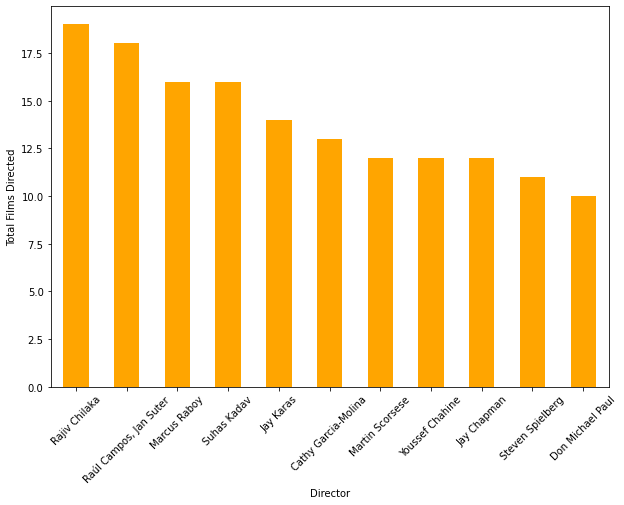

In [34]:
# Creating a bar graph 
plt.figure(figsize = (10, 7))
director_cnt.plot(kind = "bar", color = "Orange")
plt.xlabel("Director")
plt.ylabel("Total Films Directed")
plt.xticks(rotation = 45)

# Working with the cast column

In [35]:
# Seperating the "," from the str in the country column
cast_cnt = netflix_df.copy()
cast_cnt = pd.concat([cast_cnt, netflix_df["cast"].str.split(",", expand = True)], axis = 1) # Combining dataframes
cast_cnt

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,...,40,41,42,43,44,45,46,47,48,49
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,...,None,None,None,None,None,None,None,None,None,None
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,2019-07-01,2018,TV-Y7,2 Seasons,...,None,None,None,None,None,None,None,None,None,None
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,...,None,None,None,None,None,None,None,None,None,None
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,...,None,None,None,None,None,None,None,None,None,None


In [36]:
cast_cnt = cast_cnt.melt(id_vars = ["type", "title"], value_vars = range(50), value_name = "cast") # Separating variable and value
cast_cnt = cast_cnt[cast_cnt["cast"].notna()] # Filtering for non-null values
cast_cnt

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: This dataframe has a column name that matches the 'value_name' column name of the resulting Dataframe. In the future this will raise an error, please set the 'value_name' parameter of DataFrame.melt to a unique name.
  """Entry point for launching an IPython kernel.


,type,title,variable,cast
1,TV Show,Blood & Water,0,Ama Qamata
2,TV Show,Ganglands,0,Sami Bouajila
4,TV Show,Kota Factory,0,Mayur More
5,TV Show,Midnight Mass,0,Kate Siegel
6,Movie,My Little Pony: A New Generation,0,Vanessa Hudgens
...,...,...,...,...
417703,TV Show,Black Mirror,47,Jon Hamm
424590,TV Show,Social Distance,48,Ayize Ma'at
426510,TV Show,Black Mirror,48,Oona Chaplin
433397,TV Show,Social Distance,49,Lovie Simone


In [37]:
cast_cnt["cast"] = cast_cnt["cast"].str.strip() # Removes any spaces

In [38]:
# Looking at the top 10 most casted actors
cast_cnt = cast_cnt["cast"].value_counts()[:11]
cast_cnt

Anupam Kher         43
Shah Rukh Khan      35
Julie Tejwani       33
Takahiro Sakurai    32
Naseeruddin Shah    32
Rupa Bhimani        31
Om Puri             30
Akshay Kumar        30
Yuki Kaji           29
Amitabh Bachchan    28
Paresh Rawal        28
Name: cast, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'Anupam Kher'),
  Text(1, 0, 'Shah Rukh Khan'),
  Text(2, 0, 'Julie Tejwani'),
  Text(3, 0, 'Takahiro Sakurai'),
  Text(4, 0, 'Naseeruddin Shah'),
  Text(5, 0, 'Rupa Bhimani'),
  Text(6, 0, 'Om Puri'),
  Text(7, 0, 'Akshay Kumar'),
  Text(8, 0, 'Yuki Kaji'),
  Text(9, 0, 'Amitabh Bachchan'),
  Text(10, 0, 'Paresh Rawal')])

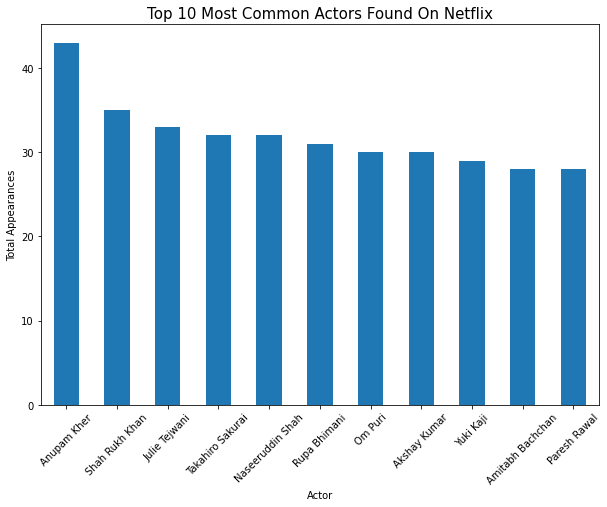

In [39]:
# Creating a bar graph
plt.figure(figsize = (10,7))
cast_cnt.plot(kind = "bar")
plt.xlabel("Actor")
plt.ylabel("Total Appearances")
plt.title("Top 10 Most Common Actors Found On Netflix", size = 15)
plt.xticks(rotation = 45)

# Working with the listed in column

In [40]:
netflix_df["listed_in"].head()

0                                        Documentaries
1      International TV Shows, TV Dramas, TV Mysteries
2    Crime TV Shows, International TV Shows, TV Act...
3                               Docuseries, Reality TV
4    International TV Shows, Romantic TV Shows, TV ...
Name: listed_in, dtype: object

In [41]:
netflix_df["listed_in"].head(50).unique()

array(['Documentaries', 'International TV Shows, TV Dramas, TV Mysteries',
       'Crime TV Shows, International TV Shows, TV Action & Adventure',
       'Docuseries, Reality TV',
       'International TV Shows, Romantic TV Shows, TV Comedies',
       'TV Dramas, TV Horror, TV Mysteries', 'Children & Family Movies',
       'Dramas, Independent Movies, International Movies',
       'British TV Shows, Reality TV', 'Comedies, Dramas',
       'Crime TV Shows, Docuseries, International TV Shows',
       'Dramas, International Movies',
       'Children & Family Movies, Comedies',
       'British TV Shows, Crime TV Shows, Docuseries',
       'TV Comedies, TV Dramas', 'Documentaries, International Movies',
       'Crime TV Shows, Spanish-Language TV Shows, TV Dramas',
       'Thrillers',
       'International TV Shows, Spanish-Language TV Shows, TV Action & Adventure',
       'International TV Shows, TV Action & Adventure, TV Dramas',
       'Comedies, International Movies',
       'Comedies, 

In [42]:
# Seperating the "," from the str in the country column
new_listed_in = netflix_df.copy()
new_listed_in = pd.concat([new_listed_in, netflix_df["listed_in"].str.split(",", expand = True)], axis = 1) # Combining dataframes
new_listed_in

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,date_month,0,1,2
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",9,Documentaries,None,None
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",9,International TV Shows,TV Dramas,TV Mysteries
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,9,Crime TV Shows,International TV Shows,TV Action & Adventure
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",9,Docuseries,Reality TV,None
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,9,International TV Shows,Romantic TV Shows,TV Comedies
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",11,Cult Movies,Dramas,Thrillers
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,2019-07-01,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...",7,Kids' TV,Korean TV Shows,TV Comedies
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,11,Comedies,Horror Movies,None
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",1,Children & Family Movies,Comedies,None


In [43]:
new_listed_in = new_listed_in.melt(id_vars = ["type", "title"], value_vars = range(3), value_name = "listed_in") # Separating variable and value
new_listed_in = new_listed_in[new_listed_in["listed_in"].notna()] # Filtering for non-null values
new_listed_in

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: This dataframe has a column name that matches the 'value_name' column name of the resulting Dataframe. In the future this will raise an error, please set the 'value_name' parameter of DataFrame.melt to a unique name.
  """Entry point for launching an IPython kernel.


,type,title,variable,listed_in
0,Movie,Dick Johnson Is Dead,0,Documentaries
1,TV Show,Blood & Water,0,International TV Shows
2,TV Show,Ganglands,0,Crime TV Shows
3,TV Show,Jailbirds New Orleans,0,Docuseries
4,TV Show,Kota Factory,0,International TV Shows
...,...,...,...,...
26414,TV Show,Zindagi Gulzar Hai,2,TV Dramas
26415,Movie,Zinzana,2,Thrillers
26416,Movie,Zodiac,2,Thrillers
26417,TV Show,Zombie Dumb,2,TV Comedies


In [44]:
new_listed_in["listed_in"] = new_listed_in["listed_in"].str.strip() # Removes any spaces

In [45]:
# Looking at the top 10 listed genres
top_10_listed = new_listed_in["listed_in"].value_counts()[:11]
top_10_listed

International Movies        2752
Dramas                      2427
Comedies                    1674
International TV Shows      1351
Documentaries                869
Action & Adventure           859
TV Dramas                    763
Independent Movies           756
Children & Family Movies     641
Romantic Movies              616
TV Comedies                  581
Name: listed_in, dtype: int64

Text(0.5, 1.0, 'Most Common Genres Found On Netflix')

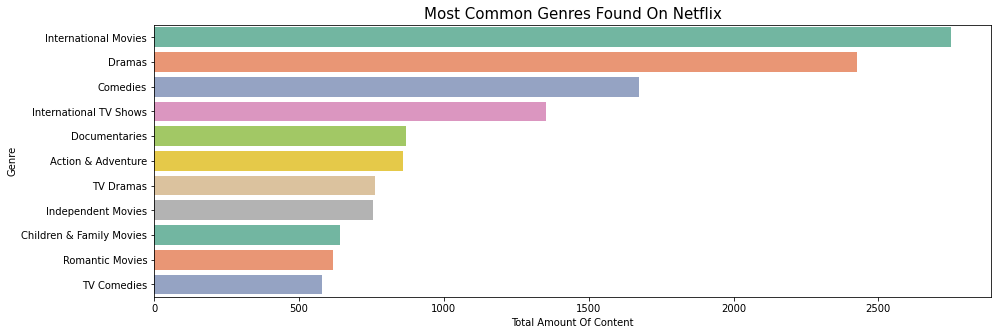

In [46]:
# Creaing a bar graph
plt.figure(figsize = (15,5))
sns.barplot(x = top_10_listed, y = top_10_listed.index, palette = "Set2")
plt.xlabel("Total Amount Of Content")
plt.ylabel("Genre")
plt.title("Most Common Genres Found On Netflix", size = 15)

<font size = "2">**The most popular genres on Netflix are International Movies, Dramas, and Comedies. The majority of the genres in the top 10 are movie related with a couple of genres for TV (International TV Shows, TV Dramas, TV Comedies).** 

# Working with the duration column

In [47]:
# Creating a variable for TV Shows
netflix_tv = netflix_df[netflix_df["type"] == "TV Show"] 

# Creating a variable for Movies
netflix_movie = netflix_df[netflix_df["type"] == "Movie"]

In [48]:
netflix_tv["duration"].unique()

array(['2 Seasons', '1 Season', '9 Seasons', '4 Seasons', '5 Seasons',
       '3 Seasons', '6 Seasons', '7 Seasons', '10 Seasons', '8 Seasons',
       '17 Seasons', '13 Seasons', '15 Seasons', '12 Seasons',
       '11 Seasons'], dtype=object)

In [49]:
netflix_movie["duration"].unique()

array(['90 min', '91 min', '125 min', '104 min', '127 min', '67 min',
       '94 min', '161 min', '61 min', '166 min', '147 min', '103 min',
       '97 min', '106 min', '111 min', '110 min', '105 min', '96 min',
       '124 min', '116 min', '98 min', '23 min', '115 min', '122 min',
       '99 min', '88 min', '100 min', '102 min', '93 min', '95 min',
       '85 min', '83 min', '113 min', '13 min', '182 min', '48 min',
       '145 min', '87 min', '92 min', '80 min', '117 min', '128 min',
       '119 min', '143 min', '114 min', '118 min', '108 min', '63 min',
       '121 min', '142 min', '154 min', '120 min', '82 min', '109 min',
       '101 min', '86 min', '229 min', '76 min', '89 min', '156 min',
       '112 min', '107 min', '129 min', '135 min', '136 min', '165 min',
       '150 min', '133 min', '70 min', '84 min', '140 min', '78 min',
       '64 min', '59 min', '139 min', '69 min', '148 min', '189 min',
       '141 min', '130 min', '138 min', '81 min', '132 min', '123 min',
       '65

In [50]:
# Checking if there are any null values inside the duration column for TV
netflix_tv[netflix_tv["duration"].isnull()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,date_month


In [51]:
# Checking if there are any null values inside the duration column for Movie
netflix_movie[netflix_movie["duration"].isnull()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,date_month
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,2017-04-04,2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi...",4
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,2016-09-16,2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...,9
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,2016-08-15,2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...,8


In [52]:
# Filtering out the null values that are in the duration column for Movie
netflix_movie = netflix_movie[netflix_movie["duration"].notna()]

In [53]:
# Changing the duration column from a str to an int datatype
netflix_movie["duration"] = netflix_movie["duration"].str.replace(" min","") 
netflix_movie["duration"] = netflix_movie["duration"].astype(str).astype(int) 
netflix_movie["duration"]

0        90
6        91
7       125
9       104
12      127
       ... 
8801     96
8802    158
8804     88
8805     88
8806    111
Name: duration, Length: 6128, dtype: int64

In [54]:
# Checking statistical data
netflix_movie["duration"].describe()

count    6128.000000
mean       99.577187
std        28.290593
min         3.000000
25%        87.000000
50%        98.000000
75%       114.000000
max       312.000000
Name: duration, dtype: float64

<AxesSubplot:xlabel='duration', ylabel='Density'>

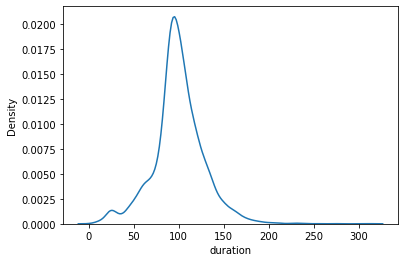

In [55]:
# Creating a kdeplot 
sns.kdeplot(data = netflix_movie["duration"])

<font size = "2">**The majority of movies are about 100 minutes with outliers being films as short as 3 minutes and films being as long as 312 minutes.**

In [56]:
# Looking at the top 10 longest movies
longest_movies = netflix_movie.groupby("title")["duration"].max().sort_values(ascending = False)[:11]
longest_movies

title
Black Mirror: Bandersnatch                            312
Headspace: Unwind Your Mind                           273
The School of Mischief                                253
No Longer kids                                        237
Lock Your Girls In                                    233
Raya and Sakina                                       230
Once Upon a Time in America                           229
Sangam                                                228
Lagaan                                                224
Jodhaa Akbar                                          214
Seven Souls in the Skull Castle: Season Moon Kagen    212
Name: duration, dtype: int64

Text(0.5, 1.0, 'Top 10 Longest Movies On Netflix')

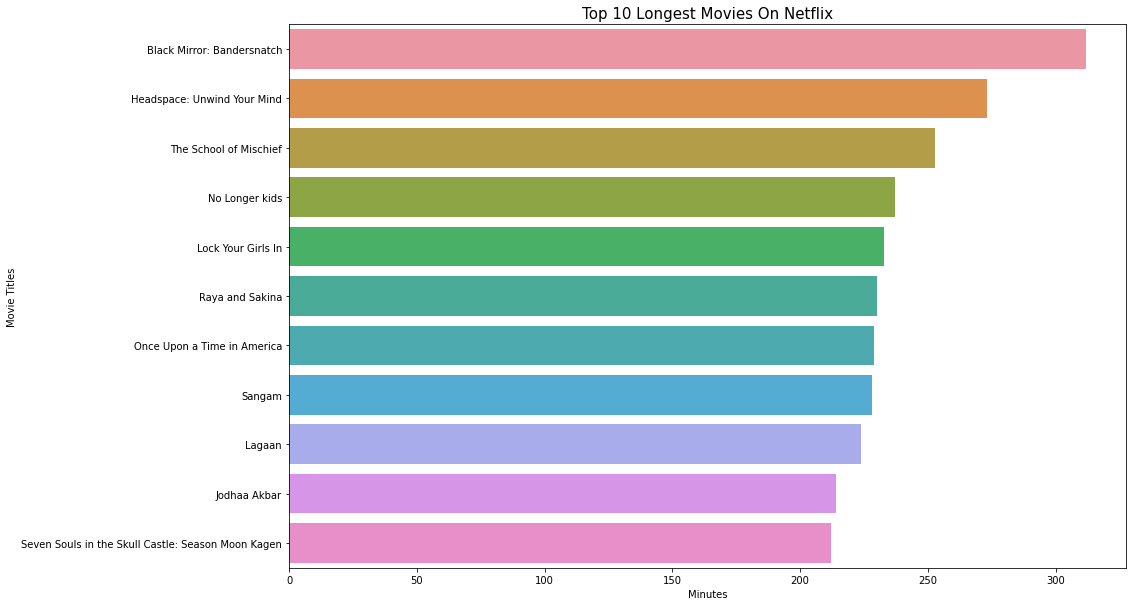

In [57]:
# Creating a bar graph
plt.figure(figsize = (15, 10))
sns.barplot(x = longest_movies, y = longest_movies.index)
plt.xlabel("Minutes")
plt.ylabel("Movie Titles")
plt.title("Top 10 Longest Movies On Netflix", size = 15)

In [58]:
# Looking at the top 10 shortest movies 
shortest_movies = netflix_movie.groupby("title")["duration"].min().sort_values()[:11]
shortest_movies

title
Silent                                                      3
Sol Levante                                                 5
Cops and Robbers                                            8
Canvas                                                      9
American Factory: A Conversation with the Obamas           10
Calico Critters: Everyone's Big Dream Flying in the Sky    11
Calico Critters: A Town of Dreams                          11
Zion                                                       12
Cosmos Laundromat: First Cycle                             12
Besieged Bread                                             12
If Anything Happens I Love You                             13
Name: duration, dtype: int64

Text(0.5, 1.0, 'Top 10 Shortest Movies On Netflix')

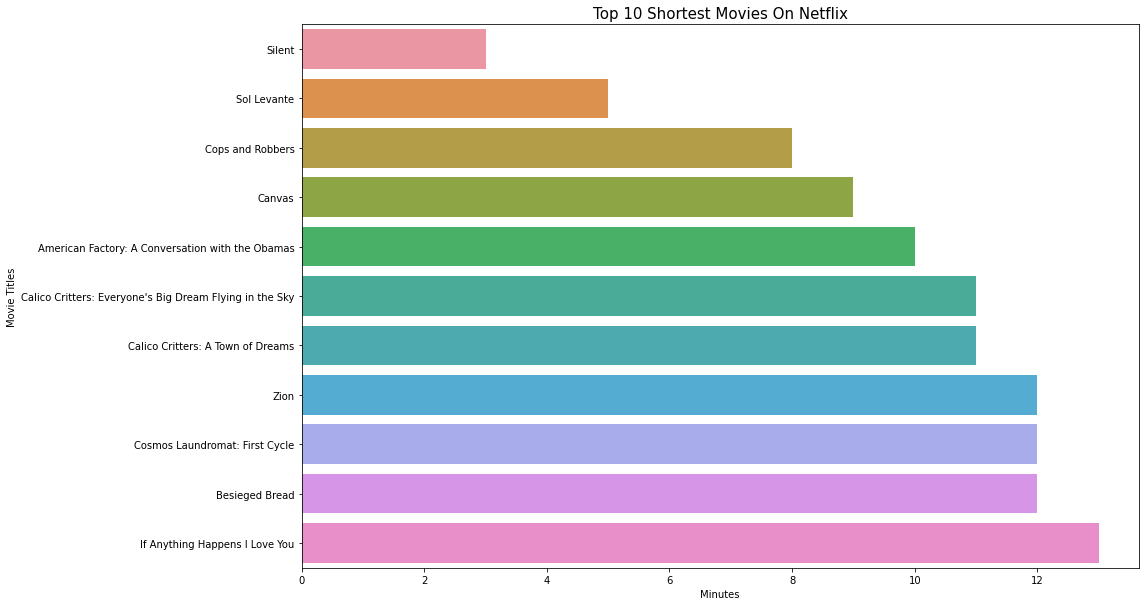

In [59]:
# Creating a bar graph
plt.figure(figsize = (15, 10))
sns.barplot(x = shortest_movies, y = shortest_movies.index)
plt.xlabel("Minutes")
plt.ylabel("Movie Titles")
plt.title("Top 10 Shortest Movies On Netflix", size = 15)

In [60]:
# Changing the duration column from a str to an int datatype
netflix_tv["duration"] = netflix_tv["duration"].str.replace(" Season","")
netflix_tv["duration"] = netflix_tv["duration"].str.replace("s","")
netflix_tv["duration"] = netflix_tv["duration"].astype(str).astype(int)
netflix_tv["duration"]

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

1       2
2       1
3       1
4       2
5       1
       ..
8795    2
8796    2
8797    3
8800    1
8803    2
Name: duration, Length: 2676, dtype: int64

In [61]:
# Checking statistical data
netflix_tv["duration"].describe() 

count    2676.000000
mean        1.764948
std         1.582752
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max        17.000000
Name: duration, dtype: float64

<AxesSubplot:xlabel='duration', ylabel='Density'>

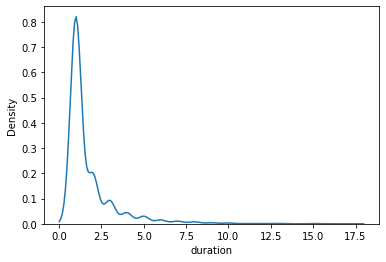

In [62]:
# Creating a kdeplot
sns.kdeplot(data = netflix_tv["duration"])

<font size = "2">**The majority of TV Shows on Netflix have 1-2 seasons with some shows that have as much as 17 seasons.** 

In [63]:
# Seeing which 10 tv shows have the longest durations
# No need to look at the shortest duration since every tv show should have at least one season
longest_tv = netflix_tv.groupby("title")["duration"].max().sort_values(ascending = False)[:11]
longest_tv

title
Grey's Anatomy                      17
NCIS                                15
Supernatural                        15
Red vs. Blue                        13
Heartland                           13
COMEDIANS of the world              13
Criminal Minds                      12
Trailer Park Boys                   12
Cheers                              11
Frasier                             11
Danger Mouse: Classic Collection    10
Name: duration, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, "Grey's Anatomy"),
  Text(1, 0, 'NCIS'),
  Text(2, 0, 'Supernatural'),
  Text(3, 0, 'Red vs. Blue'),
  Text(4, 0, 'Heartland'),
  Text(5, 0, 'COMEDIANS of the world'),
  Text(6, 0, 'Criminal Minds'),
  Text(7, 0, 'Trailer Park Boys'),
  Text(8, 0, 'Cheers'),
  Text(9, 0, 'Frasier'),
  Text(10, 0, 'Danger Mouse: Classic Collection')])

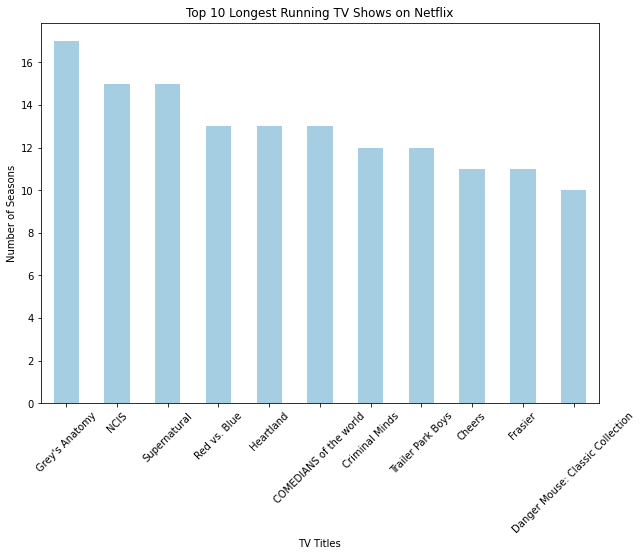

In [64]:
# Creating a bar graph
plt.figure(figsize = (10, 7))
longest_tv.plot(kind = "bar", colormap = "Paired")
plt.xlabel("TV Titles")
plt.ylabel("Number of Seasons")
plt.title("Top 10 Longest Running TV Shows on Netflix")
plt.xticks(rotation = 45)

<font size = "2">**The top 10 longest running TV Shows on Netflix have a minimum of 1 season and a maximum of 17 seasons.**

# Working with the description column

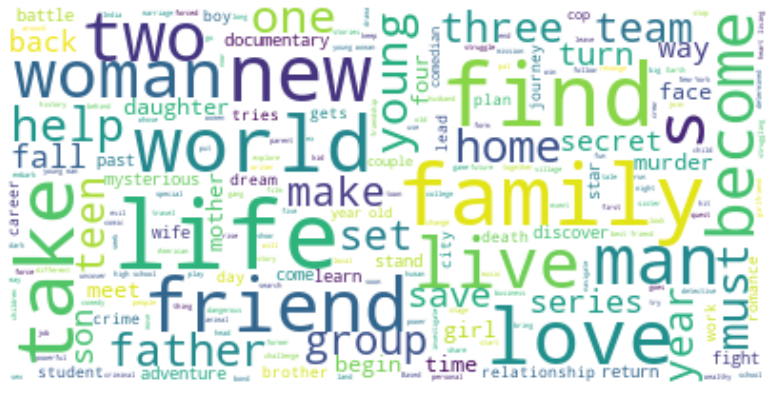

In [65]:
# Creating a wordcloud
plt.figure(figsize = (15,7))

# Creating a for loop to go through the entire description column
text = "".join(description for description in netflix_df.description)

# Creating the word cloud image
wordcloud = WordCloud(max_font_size = 50, background_color = "white").generate(text)

# Displaying the world cloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

<font size = "2">**Whilst looking at this wordcloud, we can see words such as find, life, love, family, friend, etc, that appear the frequently in descriptions of movies and TV shows that are on Netflix. These are words that everyone can relate to and understand regardless of where they come from, which are potential reasons why Netflix create and acquire films that directly revole around them.**

# Working with the title column

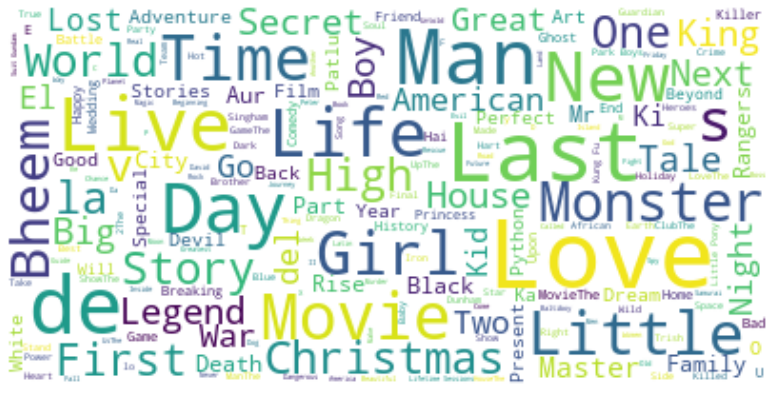

In [66]:
# Creating a wordcloud
plt.figure(figsize = (15,7))

# Creating a for loop to go through the entire title column
title = "".join(title for title in netflix_df.title)

# Creating the word cloud image
word_cloud = WordCloud(max_font_size = 50, background_color = "white").generate(title)

# Displaying the world cloud
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

<font size = "2">**Titles on Netflix seem to feature words such as Last, Love, Man, Live, New, Life, etc, that appear frequently. It seems to share similarities to the wordcloud for the description column, but also features different words that you don't see in each cloud and just like the description, the titles have words that everyone can relate to and understand regardless of where they come from.**  

# Searching up interesting topics that I like

In [67]:
# Seeing what titles Netflix has from the esteemed director, Christopher Nolan
netflix_df.set_index("director").filter(like = "Christopher Nolan", axis = 0)

,show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description,date_month
director,,,,,,,,,,,,
Christopher Nolan,s341,Movie,Inception,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellio...","United States, United Kingdom",2021-08-01,2010,PG-13,148 min,"Action & Adventure, Sci-Fi & Fantasy, Thrillers",A troubled thief who extracts secrets from peo...,8


In [68]:
# Seeing what titles Jackie Chan has starred in that is avaliable on Netflix
netflix_df.set_index("cast").filter(like = "Jackie Chan", axis = 0)

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,description,date_month
cast,,,,,,,,,,,,
"Jack Black, Dustin Hoffman, Angelina Jolie, Ian McShane, Seth Rogen, Lucy Liu, Jackie Chan, David Cross, Randall Duk Kim, James Hong",s574,Movie,Kung Fu Panda,"John Stevenson, Mark Osborne","United States, China",2021-07-01,2008,PG,94 min,"Children & Family Movies, Comedies",When a powerful villain comes after peace in h...,7
"Jack Black, Angelina Jolie, Dustin Hoffman, Gary Oldman, Seth Rogen, Lucy Liu, Jackie Chan, David Cross, James Hong, Michelle Yeoh",s575,Movie,Kung Fu Panda 2,Jennifer Yuh Nelson,"United States, China",2021-07-01,2011,PG,93 min,"Children & Family Movies, Comedies","With his fists up and belly full, Po embarks o...",7
"Donnie Yen, Jaycee Chan, Charlene Choi, Gillian Chung, Wilson Chen Bo-Lin, Tony Leung Ka Fai, Qu Ying, Fan Bingbing, Xie Jing-jing, Daniel Wu, Edison Chen, Jackie Chan",s3650,Movie,The Twins Effect II,"Corey Yuen, Patrick Leung","Hong Kong, China",2019-07-21,2004,TV-14,106 min,"Action & Adventure, Comedies, International Mo...",An empress rules over a land where men are sub...,7
"Jack Black, Angelina Jolie, Dustin Hoffman, Jackie Chan, Seth Rogen, Lucy Liu, David Cross, James Hong, Dan Fogler",s7242,Movie,Kung Fu Panda: Holiday,Tim Johnson,United States,2012-12-01,2010,TV-PG,26 min,"Children & Family Movies, Comedies","As preparations for the Winter Feast build, Po...",12
"Jackie Chan, Disha Patani, Amyra Dastur, Sonu Sood, Aarif Rahman, Miya Muqi, Zhang Yixing, Eric Tsang",s7243,Movie,Kung Fu Yoga,Stanley Tong,"China, India, Nepal",2017-10-06,2017,TV-PG,107 min,"Action & Adventure, Comedies, International Mo...",Two mismatched archaeologists battle a team of...,10
"Jackie Chan, Zitao Huang, Jaycee Chan, Wang Kai, Hiroyuki Ikeuchi, Sang Ping, Alan Ng, Xu Fan, Darren Wang",s7824,Movie,Railroad Tigers,Ding Sheng,China,2017-08-19,2016,TV-14,124 min,"Action & Adventure, Comedies, International Mo...","During World War II, a Chinese railroad worker...",8
"Jackie Chan, Anita Mui, Françoise Yip, Bill Tung, Marc Akerstream, Garvin Cross, Morgan Lam, Ailen Sit",s7901,Movie,Rumble in the Bronx,Stanley Tong,Hong Kong,2019-11-01,1995,R,89 min,"Action & Adventure, Comedies, International Mo...",During a visit to the Bronx to help out at his...,11
"Jackie Chan, Johnny Knoxville, Fan Bingbing, Eric Tsang, Eve Torres, Winston Chao",s8033,Movie,Skiptrace,Renny Harlin,"China, Hong Kong, United States",2019-07-04,2016,PG-13,107 min,"Action & Adventure, Comedies",To capture a crime lord who killed his partner...,7
"Jackie Chan, Jet Li, Collin Chou, Liu Yifei, Li Bingbing, Michael Angarano, Morgan Benoit, Juana Collignon, Wang Deshun, Thomas McDonell",s8308,Movie,The Forbidden Kingdom,Rob Minkoff,"United States, China",2019-07-01,2008,PG-13,104 min,"Action & Adventure, Sci-Fi & Fantasy",Jackie Chan and Jet Li star in this rousing ad...,7


In [69]:
# Looking at anime series avaliable on Netflix
netflix_tv[(netflix_tv["country"] == "Japan") & (netflix_tv["listed_in"].str.contains("Anime"))]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,date_month
76,s77,TV Show,Yowamushi Pedal,NaN,"Daiki Yamashita, Kohsuke Toriumi, Jun Fukushim...",Japan,2021-09-14,2013,TV-14,1,"Anime Series, International TV Shows","A timid, anime-loving teen gets drawn into a s...",9
154,s155,TV Show,Kuroko's Basketball,NaN,"Kensho Ono, Yuki Ono, Chiwa Saito, Yoshimasa H...",Japan,2021-09-01,2015,TV-MA,3,"Anime Series, International TV Shows, Teen TV ...",Five middle school basketball stars went to se...,9
219,s220,TV Show,EDENS ZERO,NaN,"Takuma Terashima, Mikako Komatsu, Rie Kugimiya...",Japan,2021-08-26,2021,TV-14,1,"Anime Series, International TV Shows","Aboard the Edens Zero, a lonely boy with the a...",8
265,s266,TV Show,Rascal Does Not Dream of Bunny Girl Senpai,NaN,"Kaito Ishikawa, Asami Seto, Nao Toyama, Atsumi...",Japan,2021-08-15,2018,TV-14,1,"Anime Series, International TV Shows, Romantic...","After experiencing ""puberty syndrome"" himself,...",8
291,s292,TV Show,SHAMAN KING,NaN,"Yoko Hikasa, Katsuyuki Konishi, Megumi Hayashi...",Japan,2021-08-09,2021,TV-14,1,"Anime Series, International TV Shows",Medium Yoh Asakura enters a battle tournament ...,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7376,s7377,TV Show,Magi: Adventure of Sinbad,NaN,"Daisuke Ono, Tomokazu Sugita, Takahiro Sakurai...",Japan,2016-07-14,2016,TV-14,1,"Anime Series, International TV Shows",The Magi who became High King of the Seven Sea...,7
7588,s7589,TV Show,Ninja Hattori,NaN,"Junko Hori, Masako Sugaya, Yuko Mita, Kaneta K...",Japan,2018-12-23,1981,TV-Y7,1,"Anime Series, Kids' TV",Elementary school student Kenichi Mitsuba's ho...,12
7627,s7628,TV Show,Nura: Rise of the Yokai Clan: Demon Capital,NaN,"Jun Fukuyama, Darrel Guilbeau, Eri Kitamura, G...",Japan,2016-12-01,2011,TV-MA,1,"Anime Series, Crime TV Shows","By night, teenage Rikuo becomes a form of demo...",12
7906,s7907,TV Show,Rurouni Kenshin,NaN,"Mayo Suzukaze, Miki Fujitani, Miina Tominaga, ...",Japan,2020-01-01,1998,TV-14,3,"Anime Series, International TV Shows",A nomadic swordsman arrives at a martial arts ...,1


<font size = "2">**It would seem that I have the choice of up to 131 animes to watch on Netflix.**


In [70]:
# Looking for TV Comedies that have 5 or more seasons from the United States
netflix_tv[(netflix_tv["duration"] >= 5) & (netflix_tv["country"] == "United States") 
           & (netflix_tv["listed_in"].str.contains("Comedies"))]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,date_month
67,s68,TV Show,Saved by the Bell,NaN,"Mark-Paul Gosselaar, Tiffani Thiessen, Mario L...",United States,2021-09-15,1994,TV-PG,9,"Kids' TV, TV Comedies","From middle school to college, best friends Za...",9
82,s83,TV Show,Lucifer,NaN,"Tom Ellis, Lauren German, Kevin Alejandro, D.B...",United States,2021-09-10,2021,TV-14,6,"Crime TV Shows, TV Comedies, TV Dramas","Bored with being the Lord of Hell, the devil r...",9
106,s107,TV Show,Bunk'd,NaN,"Peyton List, Karan Brar, Skai Jackson, Miranda...",United States,2021-09-05,2021,TV-G,5,"Kids' TV, TV Comedies","The Ross siblings of Disney's hit series ""Jess...",9
274,s275,TV Show,Grace and Frankie,NaN,"Jane Fonda, Lily Tomlin, Martin Sheen, Sam Wat...",United States,2021-08-13,2021,TV-MA,7,"TV Comedies, TV Dramas","They’re not friends, but when their husbands l...",8
323,s324,TV Show,30 Rock,NaN,"Tina Fey, Alec Baldwin, Tracy Morgan, Jane Kra...",United States,2021-08-01,2012,TV-14,7,TV Comedies,Liz Lemon juggles the demands of running an NB...,8
526,s527,TV Show,Orange Is the New Black,NaN,"Taylor Schilling, Kate Mulgrew, Laura Prepon, ...",United States,2021-07-06,2019,TV-MA,7,"TV Comedies, TV Dramas",A privileged New Yorker ends up in a women's p...,7
667,s668,TV Show,Glee,NaN,"Lea Michele, Chris Colfer, Jane Lynch, Matthew...",United States,2021-06-19,2015,TV-14,6,"TV Comedies, TV Dramas, Teen TV Shows",Amid relationship woes and personal attacks fr...,6
1043,s1044,TV Show,Gilmore Girls,NaN,"Lauren Graham, Alexis Bledel, Scott Patterson,...",United States,2021-04-15,2006,TV-14,7,"Romantic TV Shows, TV Comedies, TV Dramas",Fiercely independent single mom Lorelai raises...,4
1851,s1852,TV Show,One on One,NaN,"Flex Alexander, Kyla Pratt, Kelly Perine, Sici...",United States,2020-10-15,2006,TV-14,5,"TV Comedies, Teen TV Shows","When his ex-wife lands a job abroad, athlete-t...",10
1922,s1923,TV Show,The Parkers,NaN,"Mo'Nique, Countess Vaughn, Dorien Wilson, Jenn...",United States,2020-10-01,2003,TV-PG,5,TV Comedies,"In this ""Moesha"" spinoff, undergraduate Kim is...",10


In [71]:
# Looking for Movie Comedies that is 90 minutes or longer from the United States
netflix_movie[(netflix_movie["duration"] >= 90) & (netflix_movie["country"] == "United States") 
           & (netflix_movie["listed_in"].str.contains("Comedies"))]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,date_month
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021-09-24,2021,PG-13,104,"Comedies, Dramas",A woman adjusting to life after a loss contend...,9
27,s28,Movie,Grown Ups,Dennis Dugan,"Adam Sandler, Kevin James, Chris Rock, David S...",United States,2021-09-20,2010,PG-13,103,Comedies,Mourning the loss of their beloved junior high...,9
139,s140,Movie,Do the Right Thing,Spike Lee,"Danny Aiello, Ossie Davis, Ruby Dee, Richard E...",United States,2021-09-01,1989,R,120,"Classic Movies, Comedies, Dramas","On a sweltering day in Brooklyn, simmering rac...",9
144,s145,Movie,House Party,Reginald Hudlin,"Christopher Reid, Christopher Martin, Robin Ha...",United States,2021-09-01,1990,R,104,"Comedies, Cult Movies","Grounded by his strict father, Kid risks life ...",9
145,s146,Movie,House Party 2,"George Jackson, Doug McHenry","Christopher Reid, Christopher Martin, Martin L...",United States,2021-09-01,1991,R,94,"Comedies, Cult Movies, Music & Musicals",Kid goes off to college with scholarship money...,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8731,s8732,Movie,While We're Young,Noah Baumbach,"Ben Stiller, Naomi Watts, Adam Driver, Amanda ...",United States,2017-10-23,2015,R,97,"Comedies, Dramas, Independent Movies",A documentary filmmaker struggling with a crea...,10
8742,s8743,Movie,Wild Wild West,Barry Sonnenfeld,"Will Smith, Kevin Kline, Kenneth Branagh, Salm...",United States,2020-01-01,1999,PG-13,106,"Action & Adventure, Comedies, Sci-Fi & Fantasy","Armed with an ingenious arsenal, two top-notch...",1
8751,s8752,Movie,Wish I Was Here,Zach Braff,"Zach Braff, Kate Hudson, Donald Faison, Joey K...",United States,2018-08-16,2014,R,106,"Comedies, Dramas, Independent Movies","With his acting career moribund, Aidan Bloom s...",8
8790,s8791,Movie,You Don't Mess with the Zohan,Dennis Dugan,"Adam Sandler, John Turturro, Emmanuelle Chriqu...",United States,2019-09-01,2008,UR,113,"Action & Adventure, Comedies",An Israeli counterterrorism soldier with a sec...,9
